In [ ]:
#why ensemble?
# wisdom of the crowd!!

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Voting Classifier

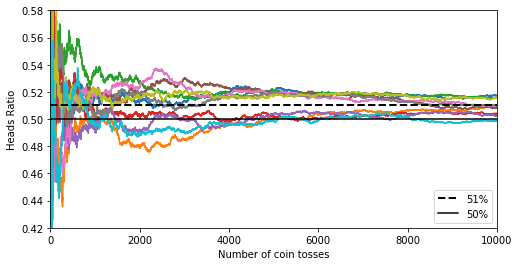

In [3]:
# law of large number
# toss coin 51% head, 49% tail
%matplotlib inline
heads_prob = 0.51
coin_toss = (np.random.rand(10000,10) < heads_prob).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_toss, axis = 0)/np.arange(1,10001).reshape(-1,1)
plt.figure(figsize = (8,4))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51],'k--', linewidth = 2, label = '51%')
plt.plot([0,10000], [0.5,0.5],'k-',label = '50%')
plt.xlabel('Number of coin tosses')
plt.ylabel('Heads Ratio')
plt.legend(loc = 'lower right')
plt.axis([0,10000,0.42,0.58])
plt.show()

In [9]:
# Ensemble methods work best when the predictors are as independent from one another as possible. One way to get diverse
# classifiers is to train them using very different algorithms. This increases the chance that they will make very different 
# types of errors, improving the ensemble’s accuracy.

In [10]:
# the following code creates and trains a voting classifier composed of three diverse classifiers
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

X, y = make_moons(n_samples = 500, noise = 0.3, random_state = 123)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)
rnd_clf = RandomForestClassifier(n_estimators = 10, random_state = 123)
log_clf = LogisticRegression(solver = 'liblinear', random_state = 123)
svm_clf = SVC(gamma = 'auto', random_state = 123)

voting_clf = VotingClassifier(estimators = [('rnd', rnd_clf),('log',log_clf),('svm',svm_clf)], voting = 'hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...',
  max_iter=-1, probability=False, random_state=123, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [11]:
#check out the accuaracy
from sklearn.metrics import accuracy_score
for clf in (rnd_clf, log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))   

RandomForestClassifier 0.896
LogisticRegression 0.824
SVC 0.888
VotingClassifier 0.888


In [12]:
# voting = 'soft'
rnd_clf = RandomForestClassifier(n_estimators = 10, random_state = 123)
log_clf = LogisticRegression(solver = 'liblinear', random_state = 123)
svm_clf = SVC(gamma = 'auto', probability = True,random_state = 123)

voting_clf = VotingClassifier(estimators = [('rnd', rnd_clf),('log',log_clf),('svm',svm_clf)], voting = 'soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rnd', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_w...f',
  max_iter=-1, probability=True, random_state=123, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [13]:
for clf in (rnd_clf, log_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))   # increases from 0.888 to 0.904

RandomForestClassifier 0.896
LogisticRegression 0.824
SVC 0.888
VotingClassifier 0.904


# Bagging ensembles

In [15]:
# Bagging and Pasting
# One way to get a diverse set of classifiers is to use very different training algorithms, as just discussed.
# Another approach is to use the same training algorithm for every predictor, but to train them on different
# random subsets of the training set.
# when sampling is performed with replacement, this method is called bagging(short for bootstrap aggregating). 
# When sampling is performed without replacement, it is called pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 100, bootstrap = True, n_jobs = -1) 
#bootstrap = False --> pasting
# = True --> bagging
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [17]:
tree_clf = DecisionTreeClassifier(random_state = 123)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.872

In [20]:
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, axes = [-1.5, 2.5, -1, 1.5], alpha = 0.5, contour = True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

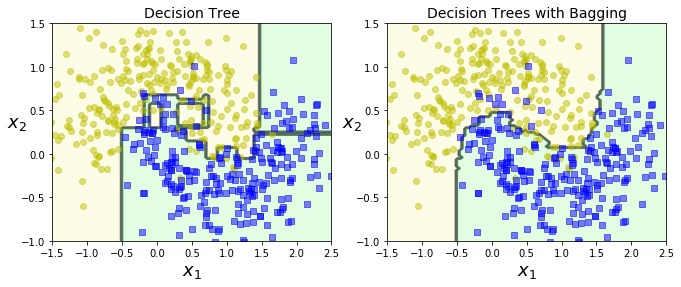

In [21]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [22]:
# out of bag evaluation
# With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score = True)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.928

In [23]:
# according to the oob evaluation, this clf is likely to achieve about 92.8% accuracy on the test set.
# verify this
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred) ## 

0.888

In [24]:
bag_clf.oob_decision_function_

array([[0.        , 1.        ],
       [0.44021739, 0.55978261],
       [1.        , 0.        ],
       [0.04615385, 0.95384615],
       [0.97687861, 0.02312139],
       [1.        , 0.        ],
       [0.96089385, 0.03910615],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.99431818, 0.00568182],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.3       , 0.7       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.2974359 , 0.7025641 ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.02061856, 0.97938144],
       [0.99453552, 0.00546448],
       [0.96089385, 0.03910615],
       [1.        , 0.        ],
       [0.01980198, 0.98019802],
       [0.06077348, 0.93922652],
       [0.

# Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
'''
is roughly equivalent to the previous RandomForestClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter = 'random', max_leaf_nodes = 16), 
    n_estimators = 500, max_samples= 1, bootstrap = True, n_jobs = -1)
'''

# Extra-Trees

In [26]:
# It is hard to tell in advance whether a RandomForestClassifier will perform better or worse than an ExtraTreesClassifier.
# Generally, the only way to know is to try both and compare them using cross-validation (and tuning the hyperparameters using
# grid search).
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state =123), n_estimators = 500,
    bootstrap =True, n_jobs = -1, oob_score = True, random_state = 123)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.9253333333333333

In [27]:
bag_clf.oob_decision_function_

array([[0.        , 1.        ],
       [0.42774566, 0.57225434],
       [1.        , 0.        ],
       [0.046875  , 0.953125  ],
       [0.98701299, 0.01298701],
       [1.        , 0.        ],
       [0.97701149, 0.02298851],
       [1.        , 0.        ],
       [0.98876404, 0.01123596],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.9939759 , 0.0060241 ],
       [1.        , 0.        ],
       [0.31638418, 0.68361582],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.28342246, 0.71657754],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01111111, 0.98888889],
       [0.98378378, 0.01621622],
       [0.96590909, 0.03409091],
       [1.        , 0.        ],
       [0.02222222, 0.97777778],
       [0.05586592, 0.94413408],
       [0.

In [28]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.872

# Feature Importance

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators = 500, n_jobs =-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(name, score)
# the most important features are the petal length and width, while sepal length and width are rather unimportant in comparison

sepal length (cm) 0.09337965931835672
sepal width (cm) 0.02438475145666395
petal length (cm) 0.4478482865765516
petal width (cm) 0.4343873026484284


# Boosting

# AdaBoost

In [30]:
## the most popular are AdaBoost and Gradient Boosting
## AdaBoost
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200,
                            algorithm = 'SAMME.R', learning_rate = 0.5, random_state = 123)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=123)

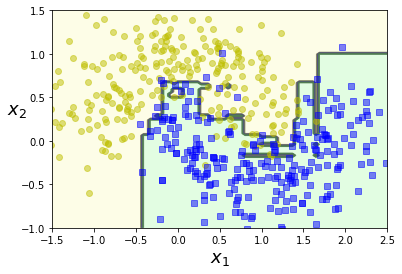

In [31]:
plot_decision_boundary(ada_clf, X, y)

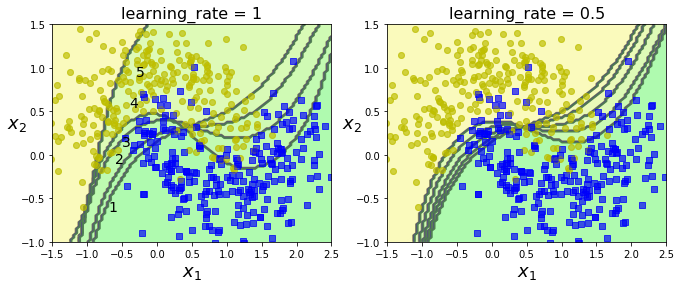

In [32]:
m = len(X_train)
plt.figure(figsize=(11,4))
for subplot, learning_rate in ((121,1),(122,0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel = 'rbf', C=0.05, gamma = 'auto', random_state =123)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred!= y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha = 0.2)
        plt.title('learning_rate = {}'.format(learning_rate), fontsize = 16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
plt.show()

In [33]:
list(m for m in dir(ada_clf) if not m.startswith('_') and m.endswith('_'))

['base_estimator_',
 'classes_',
 'estimator_errors_',
 'estimator_weights_',
 'estimators_',
 'feature_importances_',
 'n_classes_']

In [ ]:
# There is one important drawback to this sequential learning technique: it cannot be parallelized (or only partially), since each
# predictor can only be trained after the previous predictor has been trained and evaluated. As a result, it does not scale as well as
# bagging or pasting.

# Gradient Boosting

In [41]:
# gradient tree boosting, or gradient boosted regression trees (GBRT)
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth = 2, random_state = 123)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')

In [43]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth = 2, random_state = 123)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=123, splitter='best')

In [44]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [45]:
X_new = np.array([[0.8]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))
y_pred

array([0.75026781])

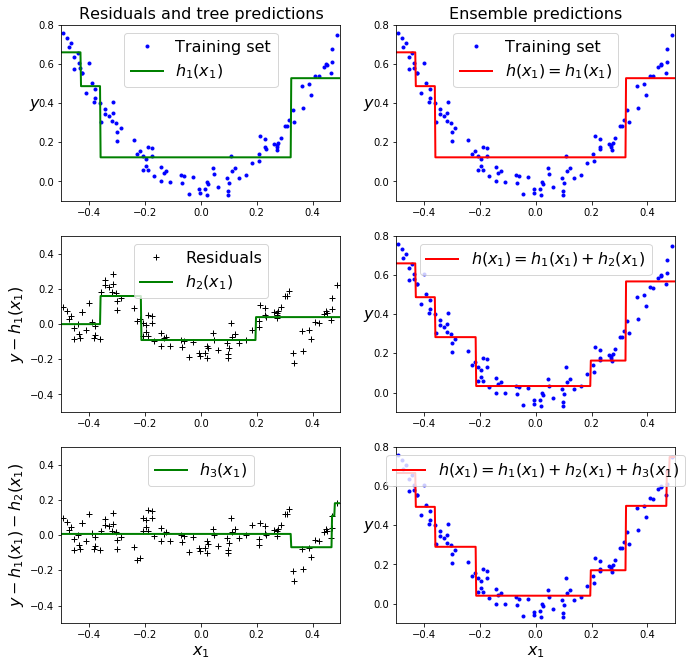

In [46]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize = (11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 3, learning_rate = 1.0, random_state = 123)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
gbrt_slow_learning = GradientBoostingRegressor(max_depth = 2, n_estimators = 200, learning_rate = 0.1, random_state = 123)
gbrt_slow_learning.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

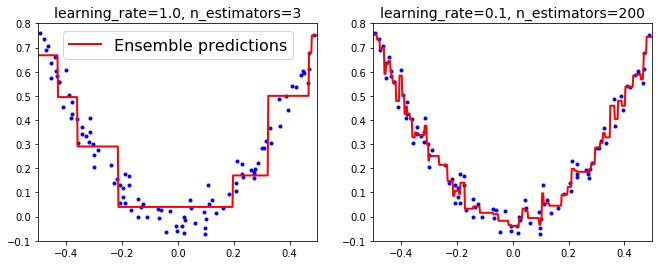

In [51]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow_learning], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow_learning.learning_rate, gbrt_slow_learning.n_estimators), fontsize=14)

plt.show()

# Gradient Boosting with Early Stopping

In [52]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 123)
gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators=120, random_state = 123)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth = 2, n_estimators=best_n_estimators, random_state = 123)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=38, n_iter_no_change=None, presort='auto',
             random_state=123, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [54]:
min_error = np.min(errors)

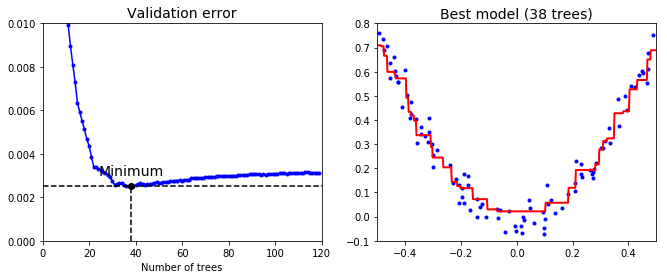

In [60]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([best_n_estimators, best_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(best_n_estimators, min_error, "ko")
plt.text(best_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % best_n_estimators, fontsize=14)

plt.show()

In [ ]:
# also can set warm_start = True, which makes Scikit-Learn keep existing trees when the fit() method is called,
# allowing incremental training. The following code stops training when the validation error does not
# improve for five iterations in a row
gbrt = GradientBoostingRegressor(max_depth = 2, warm_start = True)
min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1,120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break
## It is possible to use Gradient Boosting with other cost functions. This is controlled by the loss hyperparameter






## if subsample = 0.25, then each tree is trained on 25% of the training instances, selected randomly
## this trades a higher bias for a lower variance.
## it also speeds up training considerably
## This technique is called Stochastic Gradient Boosting

# XGBoost (Stacking)

In [62]:
import xgboost

In [64]:
xgb_reg = xgboost.XGBRegressor(random_state = 123)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print('Validation MSE: ',val_error)

Validation MSE:  0.0032402316268741282


In [65]:
xgb_reg.fit(X_train, y_train, eval_set = [(X_val, y_val)], early_stopping_rounds = 2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print('validation MSE: ', val_error)

[0]	validation_0-rmse:0.326309
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.29684
[2]	validation_0-rmse:0.270443
[3]	validation_0-rmse:0.247766
[4]	validation_0-rmse:0.22641
[5]	validation_0-rmse:0.207021
[6]	validation_0-rmse:0.188756
[7]	validation_0-rmse:0.174056
[8]	validation_0-rmse:0.158987
[9]	validation_0-rmse:0.147448
[10]	validation_0-rmse:0.137016
[11]	validation_0-rmse:0.126794
[12]	validation_0-rmse:0.117064
[13]	validation_0-rmse:0.108817
[14]	validation_0-rmse:0.102161
[15]	validation_0-rmse:0.095651
[16]	validation_0-rmse:0.090599
[17]	validation_0-rmse:0.085348
[18]	validation_0-rmse:0.081406
[19]	validation_0-rmse:0.077523
[20]	validation_0-rmse:0.073743
[21]	validation_0-rmse:0.071122
[22]	validation_0-rmse:0.068954
[23]	validation_0-rmse:0.066904
[24]	validation_0-rmse:0.065126
[25]	validation_0-rmse:0.063449
[26]	validation_0-rmse:0.061468
[27]	validation_0-rmse:0.059641
[28]	validation_0-rmse:0.058014
[29]	validation_0-rm

In [66]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train)

29.3 ms ± 994 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

11.2 ms ± 294 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Try on other datasets

In [68]:
# more exercise on MNIST
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', cache = False)
import numpy as np
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
sort_by_target(mnist)

In [69]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(mnist.data, mnist.target, test_size = 10000, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 10000, random_state = 42)

In [70]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

In [71]:
random_forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
extra_trees_clf = ExtraTreesClassifier(n_estimators=10, random_state=42)
svm_clf = LinearSVC(random_state=42)
mlp_clf = MLPClassifier(random_state=42)

In [72]:
estimators = [random_forest_clf, extra_trees_clf, svm_clf, mlp_clf]
for estimator in estimators:
    print("Training the", estimator)
    estimator.fit(X_train, y_train)

Training the RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Training the LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class=

D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training the MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


In [73]:
[estimator.score(X_val, y_val) for estimator in estimators]

[0.9467, 0.9512, 0.8327, 0.9618]

In [75]:
from sklearn.ensemble import VotingClassifier

In [76]:
named_estimators = [
    ('random_forest_clf', random_forest_clf),
    ('extra_trees_clf', extra_trees_clf),
    ('svm_clf', svm_clf),
    ('mlp_clf', mlp_clf)
]

In [77]:
voting_clf = VotingClassifier(named_estimators)

In [78]:
voting_clf.fit(X_train, y_train)

D:\anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


VotingClassifier(estimators=[('random_forest_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [79]:
voting_clf.score(X_val, y_val)

0.9658

In [80]:
[estimator.score(X_val, y_val) for estimator in voting_clf.estimators_]

[0.9467, 0.9512, 0.8327, 0.9618]

In [81]:
# remove the SVM to see if performance improves
voting_clf.set_params(svm_clf=None)

VotingClassifier(estimators=[('random_forest_clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   ...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [82]:
voting_clf.estimators

[('random_forest_clf',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
              oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('extra_trees_clf',
  ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
             oob_score=False, random_state=42, verbose=0, warm_start=False)),
 ('svm_clf', None),
 ('mlp_clf',
  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
 

In [84]:
del voting_clf.estimators_[2]

In [85]:
voting_clf.score(X_val, y_val) # a bit better

0.9679

In [86]:
# try using a soft voting classifier
voting_clf.voting = 'soft'

In [87]:
voting_clf.score(X_val, y_val) # another improvement!

0.9716

In [88]:
voting_clf.score(X_test, y_test)

0.9683

In [89]:
[estimator.score(X_test, y_test) for estimator in voting_clf.estimators_]

[0.9434, 0.9444, 0.9615]

In [ ]:
# another try on stacking ensemble

In [90]:
## Run the individual classifiers from the previous exercise to make predictions on the validation set, 
## and create a new training set with the resulting predictions: each training instance is a vector containing the 
## set of predictions from all your classifiers for an image, and the target is the image's class. 
## Train a classifier on this new training set.

In [91]:
X_val_predictions = np.empty((len(X_val),len(estimators)), dtype = np.float32)
for index, estimator in enumerate(estimators):
    X_val_predictions[:, index] = estimator.predict(X_val)

In [92]:
X_val_predictions

array([[2., 2., 2., 2.],
       [7., 7., 7., 7.],
       [4., 4., 4., 4.],
       ...,
       [4., 4., 4., 4.],
       [9., 9., 9., 9.],
       [4., 4., 4., 4.]], dtype=float32)

In [93]:
rnd_forest_blender = RandomForestClassifier(n_estimators = 200, oob_score = True, random_state = 42)
rnd_forest_blender.fit(X_val_predictions, y_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [95]:
rnd_forest_blender.oob_score_

0.9678

In [96]:
## evaluate the ensemble on the test set. For each image in the test set, make predictions with all classifiers, 
## then feed the predictions to the blender to get the ensemble's predictions. 

In [99]:
X_test_predictions = np.empty((len(X_test), len(estimators)), dtype = np.float32)

for index, estimator in enumerate(estimators):
    X_test_predictions[:,index] = estimator.predict(X_test)

In [100]:
y_pred = rnd_forest_blender.predict(X_test_predictions)

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
accuracy_score(y_test, y_pred)

#### This stacking ensemble does not outperform the soft voting classifier, it is just as good as the best individual classifier

0.9616